In [6]:
# First let's import the packages we will use in this project\n",
# You can do this all now or as you need them\n",
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# read data

df = pd.read_csv(r'D:\\Projeto Data Analyst\\python\\archive\movies.csv')


In [7]:
#consultar data

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
       pct_missing = np.mean(df[col].isnull())
       print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [10]:
# Data Types for our columns
    
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
df = df.fillna(0)
df ['budget'] = df ['budget'].astype('int64')
df ['gross'] = df ['gross'].astype('int64')
df ['votes'] = df ['votes'].astype('int64')

In [15]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [17]:
#criar coluna com o ano correto de lançamento 
#df['yearcorrect'] = df['released'].astype(str).str[:4] --- os 4 primeiros caracteres
df['yearcorrect'] = df['released'].str.split('[(,\s)]{1}').str[3]
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [34]:
# Order our Data

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [39]:
#Mostrar as linhas todas
pd.set_option('display.max_rows', None)


In [37]:
#remover duplicados
#df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates(subset ="company",keep = False, inplace = True)
#df.drop_duplicates() ----toda a informação duplicada



In [31]:
#budegt high Correlation 
#company high Correlation 


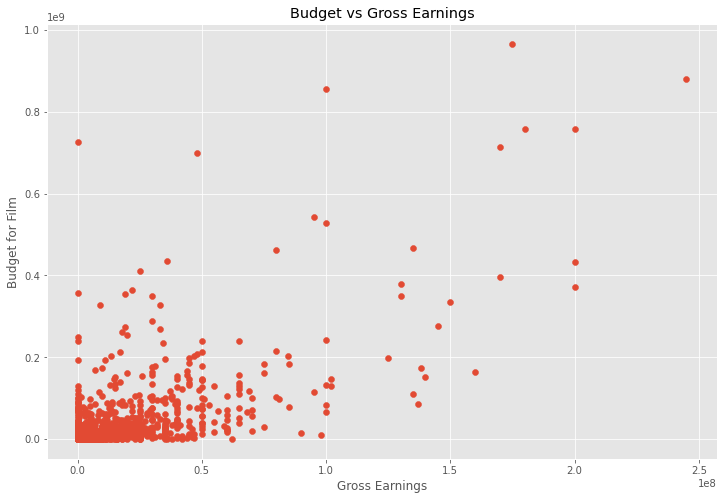

In [43]:
# scatter ploter with budget vs gross



plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()



In [41]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6905,The Jungle Book,PG,Adventure,2016,"April 15, 2016 (United States)",7.4,264000,Jon Favreau,Justin Marks,Neel Sethi,United Kingdom,175000000,966554929,Fairview Entertainment,106.0,2016
6665,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000,880681519,B24,148.0,2015
7254,Venom,PG-13,Action,2018,"October 5, 2018 (United States)",6.7,387000,Ruben Fleischer,Jeff Pinkner,Tom Hardy,China,100000000,856085151,Avi Arad Productions,112.0,2018
7455,Fast & Furious Presents: Hobbs & Shaw,PG-13,Action,2019,"August 2, 2019 (United States)",6.4,184000,David Leitch,Chris Morgan,Dwayne Johnson,United States,200000000,759056935,Chris Morgan Productions,137.0,2019
6479,Maleficent,PG,Action,2014,"May 30, 2014 (United States)",7.0,353000,Robert Stromberg,Linda Woolverton,Angelina Jolie,United States,180000000,758411779,Jolie Pas,97.0,2014
7573,Ne Zha,Not Rated,Animation,2019,"July 26, 2019 (China)",7.5,6500,Yu Yang,Yu Yang,Yanting Lü,China,0,726264074,Coco Cartoon,110.0,2019
6448,Captain America: The Winter Soldier,PG-13,Action,2014,"April 4, 2014 (United States)",7.7,764000,Anthony Russo,Christopher Markus,Chris Evans,United States,170000000,714421503,Marvel Entertainment,136.0,2014
7565,The Wandering Earth,TV-MA,Action,2019,"February 5, 2019 (China)",6.0,28000,Frant Gwo,Gong Geer,Jing Wu,China,48000000,699992512,Beijing Dengfeng International Culture Communi...,125.0,2019
6662,Cinderella,PG,Drama,2015,"March 13, 2015 (United States)",6.9,165000,Kenneth Branagh,Chris Weitz,Lily James,United States,95000000,542358331,Allison Shearmur Productions,105.0,2015
7057,Dunkirk,PG-13,Action,2017,"July 21, 2017 (United States)",7.8,582000,Christopher Nolan,Christopher Nolan,Fionn Whitehead,United Kingdom,100000000,527016307,Syncopy,106.0,2017


<AxesSubplot:xlabel='budget', ylabel='gross'>

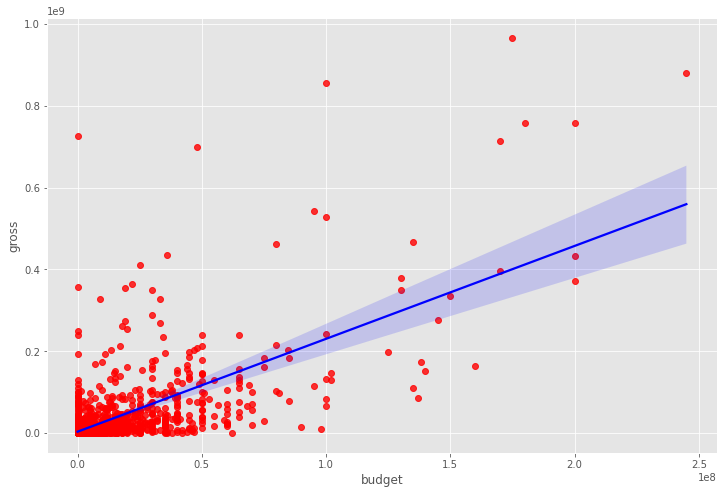

In [45]:
# plot with budget vs gross with seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [51]:
#Looking at Correlation
df.corr() #pearson,kendall, spearman
#df.corr(method='kendall') #pearson, kendall, spearman
#df.corr(method='spearman') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.103188,0.177300,0.166804,0.206697,0.093059
score,0.103188,1.000000,0.320277,-0.049529,0.093394,0.359445
votes,0.177300,0.320277,1.000000,0.348000,0.505073,0.155089
budget,0.166804,-0.049529,0.348000,1.000000,0.682481,0.136651
gross,0.206697,0.093394,0.505073,0.682481,1.000000,0.116413
runtime,0.093059,0.359445,0.155089,0.136651,0.116413,1.000000


In [52]:
# high correlation budget vs gross


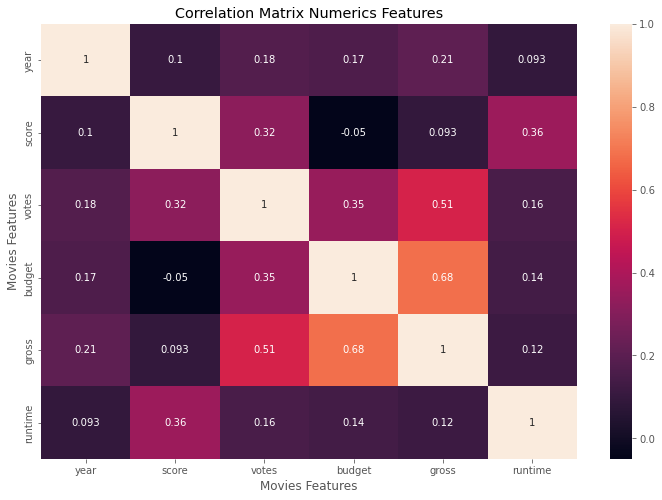

In [56]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Numerics Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [57]:
# Looks at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6905,The Jungle Book,PG,Adventure,2016,"April 15, 2016 (United States)",7.4,264000,Jon Favreau,Justin Marks,Neel Sethi,United Kingdom,175000000,966554929,Fairview Entertainment,106.0,2016
6665,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000,880681519,B24,148.0,2015
7254,Venom,PG-13,Action,2018,"October 5, 2018 (United States)",6.7,387000,Ruben Fleischer,Jeff Pinkner,Tom Hardy,China,100000000,856085151,Avi Arad Productions,112.0,2018
7455,Fast & Furious Presents: Hobbs & Shaw,PG-13,Action,2019,"August 2, 2019 (United States)",6.4,184000,David Leitch,Chris Morgan,Dwayne Johnson,United States,200000000,759056935,Chris Morgan Productions,137.0,2019
6479,Maleficent,PG,Action,2014,"May 30, 2014 (United States)",7.0,353000,Robert Stromberg,Linda Woolverton,Angelina Jolie,United States,180000000,758411779,Jolie Pas,97.0,2014


In [58]:
#atribuir um valor numerico aos campos não numericos

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6905,1402,4,1,2016,40,7.4,264000,642,773,909,47,175000000,966554929,715,106.0,37
6665,1154,5,0,2015,1119,6.8,393000,1124,717,224,47,245000000,880681519,211,148.0,36
7254,1623,5,0,2018,1265,6.7,387000,1111,642,1218,9,100000000,856085151,202,112.0,39
7455,449,5,0,2019,194,6.4,184000,268,236,290,48,200000000,759056935,466,137.0,40
6479,787,4,0,2014,988,7.0,353000,1083,858,59,48,180000000,758411779,991,97.0,35
7573,886,3,2,2019,645,7.5,6500,1342,1488,1284,9,0,726264074,516,110.0,40
6448,246,5,0,2014,125,7.7,764000,72,250,180,48,170000000,714421503,1152,136.0,35
7565,1535,8,0,2019,455,6.0,28000,377,494,546,9,48000000,699992512,258,125.0,40
6662,276,4,6,2015,778,6.9,165000,711,238,733,48,95000000,542358331,99,105.0,36
7057,399,5,0,2017,631,7.8,582000,199,251,347,47,100000000,527016307,1548,106.0,38


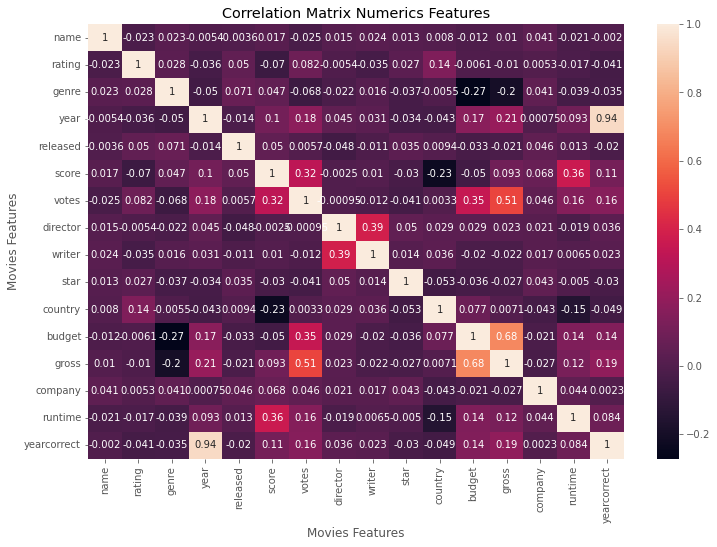

In [59]:
#All fields Correlation
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Numerics Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [60]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.023248,0.022690,-0.005410,-0.003577,0.017085,-0.024703,0.015239,0.023793,0.013142,0.007992,-0.011748,0.010485,0.040502,-0.021492,-0.001993
rating,-0.023248,1.000000,0.027590,-0.036442,0.049946,-0.070185,0.081679,-0.005411,-0.034748,0.026554,0.137249,-0.006100,-0.010327,0.005268,-0.017105,-0.041046
genre,0.022690,0.027590,1.000000,-0.050447,0.070758,0.046561,-0.067787,-0.021706,0.015907,-0.036564,-0.005491,-0.272002,-0.197732,0.041074,-0.039476,-0.034718
year,-0.005410,-0.036442,-0.050447,1.000000,-0.014154,0.103188,0.177300,0.045216,0.030984,-0.034432,-0.042819,0.166804,0.206697,0.000748,0.093059,0.943085
released,-0.003577,0.049946,0.070758,-0.014154,1.000000,0.049954,0.005698,-0.048490,-0.010874,0.035493,0.009400,-0.032709,-0.021479,0.045653,0.012625,-0.020454
score,0.017085,-0.070185,0.046561,0.103188,0.049954,1.000000,0.320277,-0.002508,0.010053,-0.029533,-0.229223,-0.049529,0.093394,0.068462,0.359445,0.108027
votes,-0.024703,0.081679,-0.067787,0.177300,0.005698,0.320277,1.000000,-0.000954,-0.011779,-0.040610,0.003281,0.348000,0.505073,0.045806,0.155089,0.159588
director,0.015239,-0.005411,-0.021706,0.045216,-0.048490,-0.002508,-0.000954,1.000000,0.388086,0.050017,0.029435,0.029160,0.022863,0.021014,-0.019060,0.035532
writer,0.023793,-0.034748,0.015907,0.030984,-0.010874,0.010053,-0.011779,0.388086,1.000000,0.014462,0.035938,-0.020066,-0.022103,0.017096,0.006502,0.023292
star,0.013142,0.026554,-0.036564,-0.034432,0.035493,-0.029533,-0.040610,0.050017,0.014462,1.000000,-0.053156,-0.035645,-0.026782,0.043472,-0.004974,-0.029924


In [62]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.023248
             genre          0.022690
             year          -0.005410
             released      -0.003577
             score          0.017085
             votes         -0.024703
             director       0.015239
             writer         0.023793
             star           0.013142
             country        0.007992
             budget        -0.011748
             gross          0.010485
             company        0.040502
             runtime       -0.021492
             yearcorrect   -0.001993
rating       name          -0.023248
             rating         1.000000
             genre          0.027590
             year          -0.036442
             released       0.049946
             score         -0.070185
             votes          0.081679
             director      -0.005411
             writer        -0.034748
             star           0.026554
             country        0.137249
 

In [63]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.272002
budget       genre         -0.272002
score        country       -0.229223
country      score         -0.229223
gross        genre         -0.197732
genre        gross         -0.197732
country      runtime       -0.150025
runtime      country       -0.150025
rating       score         -0.070185
score        rating        -0.070185
votes        genre         -0.067787
genre        votes         -0.067787
star         country       -0.053156
country      star          -0.053156
genre        year          -0.050447
year         genre         -0.050447
budget       score         -0.049529
score        budget        -0.049529
yearcorrect  country       -0.048567
country      yearcorrect   -0.048567
released     director      -0.048490
director     released      -0.048490
year         country       -0.042819
country      year          -0.042819
company      country       -0.042790
country      company       -0.042790
yearcorrect  rating        -0.041046
r

In [64]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.505073
votes        gross          0.505073
gross        budget         0.682481
budget       gross          0.682481
yearcorrect  year           0.943085
year         yearcorrect    0.943085
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings